d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

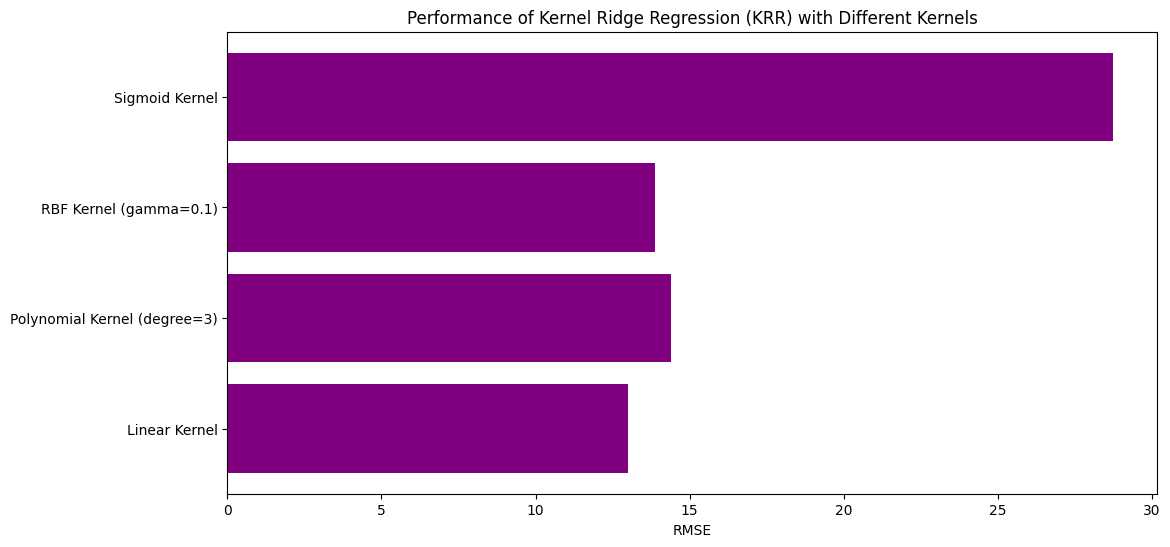

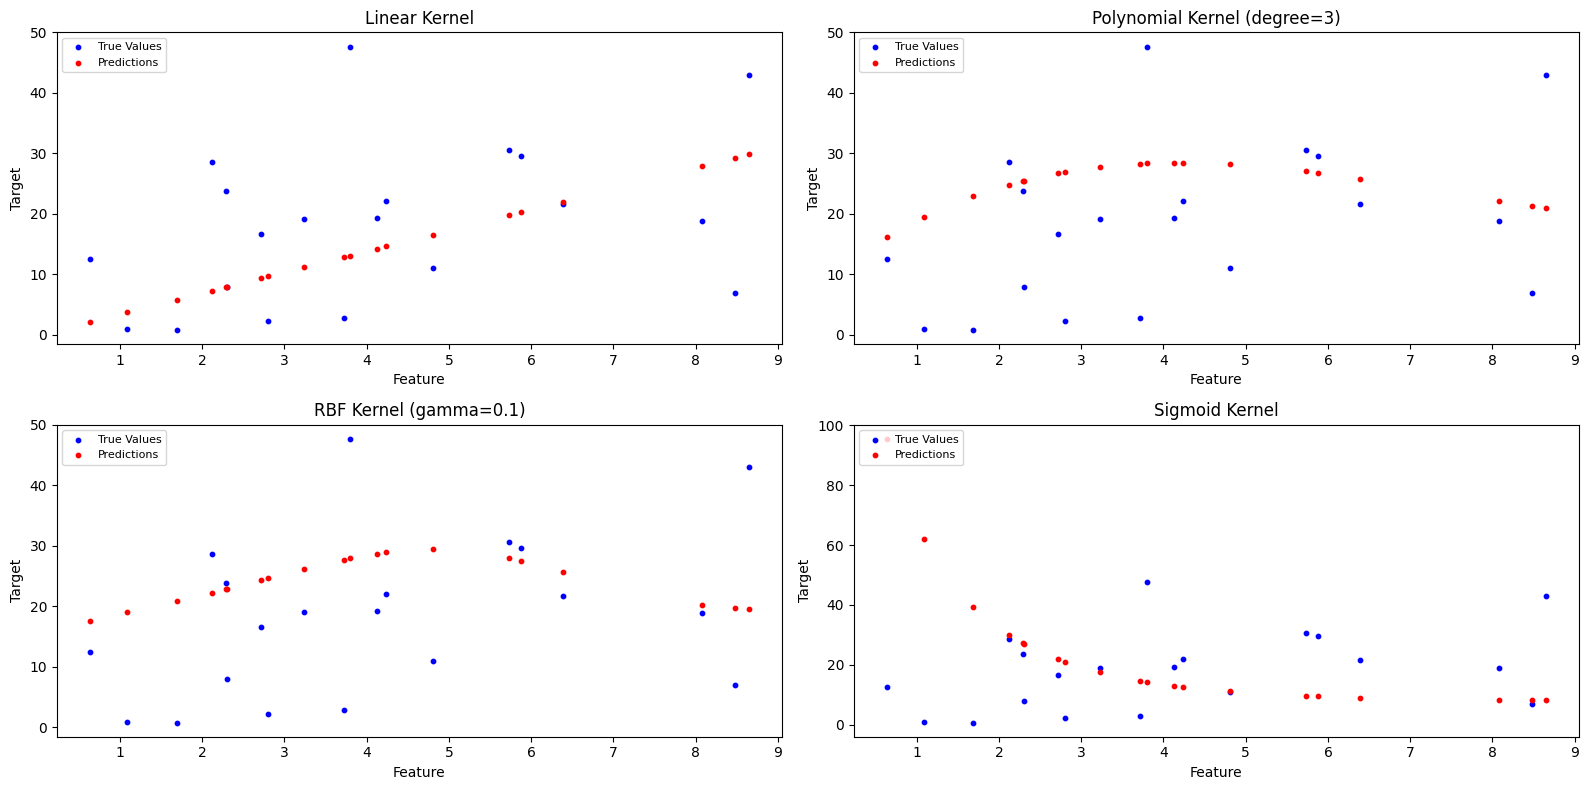

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = np.random.rand(100, 1) * 10, np.random.rand(100) * 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different kernels for Kernel Ridge Regression
kernels = {
    "Linear Kernel": KernelRidge(kernel="linear", alpha=1.0),
    "Polynomial Kernel (degree=3)": KernelRidge(kernel="poly", alpha=1.0, degree=3),
    "RBF Kernel (gamma=0.1)": KernelRidge(kernel="rbf", alpha=1.0, gamma=0.1),
    "Sigmoid Kernel": KernelRidge(kernel="sigmoid", alpha=1.0),
}

# Train, predict, and evaluate models with different kernels
results_krr = {}
predictions_krr = {}
for name, model in kernels.items():
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results_krr[name] = rmse
    predictions_krr[name] = y_pred

# Visualize RMSE for each kernel
plt.figure(figsize=(12, 6))
plt.barh(list(results_krr.keys()), list(results_krr.values()), color='purple')
plt.xlabel("RMSE")
plt.title("Performance of Kernel Ridge Regression (KRR) with Different Kernels")
plt.show()

# Visualize Predictions vs. True Values for each kernel
plt.figure(figsize=(16, 8))
for i, (name, y_pred) in enumerate(predictions_krr.items()):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='True Values', s=10)
    plt.scatter(X_test, y_pred, color='red', label='Predictions', s=10)
    plt.title(name)
    plt.legend(loc="upper left", fontsize=8)
    plt.xlabel("Feature")
    plt.ylabel("Target")

plt.tight_layout()
plt.show()


### **核函数的作用与选型建议**

#### **1. 线性核 (Linear Kernel)**
- **公式**: $ K(x, x') = x \cdot x' $
- **适用场景**:
  - 数据特征之间是线性关系。
- **优缺点**:
  - **优点**: 计算简单，效率高。
  - **缺点**: 无法捕捉非线性特性。

#### **2. 多项式核 (Polynomial Kernel)**
- **公式**: $ K(x, x') = (\text{coef0} + x \cdot x')^\text{degree} $
- **适用场景**:
  - 数据特征之间具有多项式关系。
- **优缺点**:
  - **优点**: 能捕捉非线性特性。
  - **缺点**: 高阶多项式可能导致过拟合。

#### **3. RBF 核 (Radial Basis Function Kernel)**
- **公式**: $ K(x, x') = \exp(-\gamma \|x - x'\|^2) $
- **适用场景**:
  - 数据特征之间具有复杂非线性关系。
- **优缺点**:
  - **优点**: 灵活性强，能处理大多数非线性问题。
  - **缺点**: 参数 γ 需要调优，对大数据效率较低。

#### **4. Sigmoid 核 (Sigmoid Kernel)**
- **公式**: $ K(x, x') = \tanh(\alpha \cdot x \cdot x' + \text{coef0}) $
- **适用场景**:
  - 特征空间类似于神经网络的激活函数。
- **优缺点**:
  - **优点**: 类似神经网络的映射能力。
  - **缺点**: 对参数敏感，可能不稳定。

---

### **选型建议**

| **任务特点**                    | **推荐核函数**               |
|--------------------------------|----------------------------|
| 数据具有线性关系                | Linear Kernel             |
| 数据具有多项式关系              | Polynomial Kernel         |
| 数据具有复杂的非线性关系        | RBF Kernel                |
| 特征间相互作用类似神经网络激活 | Sigmoid Kernel            |
